In [59]:
import os
from glob import glob
import yaml
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json
from scipy.stats import wilcoxon
from itertools import combinations
import scienceplots
plt.style.use('science')

In [22]:
def extract_scores(path, key='mean'):
    with open(path, 'r') as f:
        scores = json.load(f)
    all_det_scores = {k: v[key] for (k, v) in filter(lambda x: 'all_det' in x[0], scores.items())}
    bl_det_scores = {k: v[key] for (k, v) in filter(lambda x: x[0][11:18] == 'yer_det', scores.items())}
    abl_det_scores = {k: v[key] for (k, v) in filter(lambda x: 'above_boundary_layer_det' in x[0], scores.items())}
    all_prob_scores = {k: v[key] for (k, v) in filter(lambda x: 'all_pro' in x[0], scores.items())}
    bl_prob_scores = {k: v[key] for (k, v) in filter(lambda x: x[0][11:18] == 'yer_pro', scores.items())}
    abl_prob_scores = {k: v[key] for (k, v) in filter(lambda x: 'above_boundary_layer_prob' in x[0], scores.items())}
    return all_det_scores, bl_det_scores, abl_det_scores, all_prob_scores, bl_prob_scores, abl_prob_scores

### Mean

In [23]:
all_det_scores = {}
boundary_layer_det_scores = {}
above_boundary_layer_det_scores = {}
all_prob_scores = {}
boundary_layer_prob_scores = {}
above_boundary_layer_prob_scores = {}

all_det, bl_det, abl_det, all_prob, bl_prob, abl_prob = extract_scores('../experiments/data/outputs/svgp/scores.json')

all_det_scores['svgp'] = all_det
boundary_layer_det_scores['svgp'] = bl_det
above_boundary_layer_det_scores['svgp'] = abl_det
all_prob_scores['svgp'] = all_prob
boundary_layer_prob_scores['svgp'] = bl_prob
above_boundary_layer_prob_scores['svgp'] = abl_prob

for dirpath in glob('../experiments/data/outputs/ablation/*'):
    path = os.path.join(dirpath, 'scores.json')
    all_det, bl_det, abl_det, all_prob, bl_prob, abl_prob = extract_scores(path)
    dirname = os.path.basename(dirpath)
    all_det_scores[dirname] = all_det
    boundary_layer_det_scores[dirname] = bl_det
    above_boundary_layer_det_scores[dirname] = abl_det
    all_prob_scores[dirname] = all_prob
    boundary_layer_prob_scores[dirname] = bl_prob
    above_boundary_layer_prob_scores[dirname] = abl_prob

In [25]:
det_columns = ['Bias98', 'Corr', 'MAE', 'Bias', 'RMSE']
prob_columns = ['ICI', 'Calib95', 'ELBO']
index = ['SVGP', 'Additive kernel', 'Meteo only', 'GP only', 'Spatiotemporal only', 'Product kernel']

index_order = ['SVGP', 'GP only', 'Spatiotemporal only', 'Meteo only',
               'Product kernel', 'Additive kernel']
det_cols_order = ['RMSE', 'MAE', 'Corr', 'Bias', 'Bias98']
prob_cols_order = ['ELBO', 'Calib95', 'ICI']

all_det_df = pd.DataFrame(all_det_scores).T
all_det_df.index = index
all_det_df.index.name = 'Model'
all_det_df.columns = det_columns
all_det_df = all_det_df.reindex(index_order)
all_det_df = all_det_df[det_cols_order]
all_det_df['Region'] = 'Entire column'

boundary_layer_det_df = pd.DataFrame(boundary_layer_det_scores).T
boundary_layer_det_df.index = index
boundary_layer_det_df.index.name = 'Model'
boundary_layer_det_df.columns = det_columns
boundary_layer_det_df = boundary_layer_det_df.reindex(index_order)
boundary_layer_det_df = boundary_layer_det_df[det_cols_order]
boundary_layer_det_df['Region'] = 'Boundary layer'

above_boundary_layer_det_df = pd.DataFrame(above_boundary_layer_det_scores).T
above_boundary_layer_det_df.index = index
above_boundary_layer_det_df.index.name = 'Model'
above_boundary_layer_det_df.columns = det_columns
above_boundary_layer_det_df = above_boundary_layer_det_df.reindex(index_order)
above_boundary_layer_det_df = above_boundary_layer_det_df[det_cols_order]
above_boundary_layer_det_df['Region'] = 'Above Boundary layer'

all_prob_df = pd.DataFrame(all_prob_scores).T
all_prob_df.index = index
all_prob_df.index.name = 'Model'
all_prob_df.columns = prob_columns
all_prob_df = all_prob_df.reindex(index_order)
all_prob_df = all_prob_df[prob_cols_order]
all_prob_df['Region'] = 'Entire column'

boundary_layer_prob_df = pd.DataFrame(boundary_layer_prob_scores).T
boundary_layer_prob_df.index = index
boundary_layer_prob_df.index.name = 'Model'
boundary_layer_prob_df.columns = prob_columns
boundary_layer_prob_df = boundary_layer_prob_df.reindex(index_order)
boundary_layer_prob_df = boundary_layer_prob_df[prob_cols_order]
boundary_layer_prob_df['Region'] = 'Boundary layer'

above_boundary_layer_prob_df = pd.DataFrame(above_boundary_layer_prob_scores).T
above_boundary_layer_prob_df.index = index
above_boundary_layer_prob_df.index.name = 'Model'
above_boundary_layer_prob_df.columns = prob_columns
above_boundary_layer_prob_df = above_boundary_layer_prob_df.reindex(index_order)
above_boundary_layer_prob_df = above_boundary_layer_prob_df[prob_cols_order]
above_boundary_layer_prob_df['Region'] = 'Above Boundary layer'

mean_deterministic_df = pd.concat([all_det_df, boundary_layer_det_df, above_boundary_layer_det_df]).set_index('Region', append=True).swaplevel()
mean_probabilistic_df = pd.concat([all_prob_df, boundary_layer_prob_df, above_boundary_layer_prob_df]).set_index('Region', append=True).swaplevel()

In [26]:
mean_deterministic_df

RMSE           MAE      Corr  \
Region               Model                                                   
Entire column        SVGP                 0.000033  5.579300e-06  0.693923   
                     GP only              0.000034  5.163900e-06  0.705195   
                     Spatiotemporal only  0.000041  6.649300e-06  0.512186   
                     Meteo only           0.000035  5.875000e-06  0.643029   
                     Product kernel       0.000036  5.861700e-06  0.616223   
                     Additive kernel      0.000034  5.855700e-06  0.654540   
Boundary layer       SVGP                 0.000061  1.659310e-05  0.683842   
                     GP only              0.000063  1.459050e-05  0.697419   
                     Spatiotemporal only  0.000075  1.681350e-05  0.535620   
                     Meteo only           0.000064  1.779290e-05  0.625342   
                     Product kernel       0.000066  1.675820e-05  0.595706   
                     Additive kernel      0.000063  1.768120e-05  0.637262   
Above Boundary layer SVGP                 0.000005  1.073600e-06  0.406515   
                     GP only              0.000005  1.307600e-06  0.398180   
                     Spatiotemporal only  0.000006  2.491300e-06  0.319772   
                     Meteo only           0.000005  9.996000e-07  0.355365   
                     Product kernel       0.000005  1.404000e-06  0.286819   
                     Additive kernel      0.000005  1.018000e-06  0.436929   

                                                  Bias        Bias98  
Region               Model                                            
Entire column        SVGP                 3.174000e-07  1.189100e-06  
                     GP only             -9.475000e-07 -1.402960e-05  
                     Spatiotemporal only -2.411800e-06 -4.091000e-05  
                     Meteo only           3.006000e-07  6.532400e-06  
                     Product kernel      -5.469000e-07 -6.065200e-06  
                     Additive kernel      4.824000e-07  2.077200e-06  
Boundary layer       SVGP                 1.355000e-06 -3.964890e-05  
                     GP only             -3.770800e-06 -6.381280e-05  
                     Spatiotemporal only -1.288210e-05 -1.169973e-04  
                     Meteo only           2.035900e-06 -3.158500e-05  
                     Product kernel      -2.549600e-06 -4.630870e-05  
                     Additive kernel      2.009700e-06 -3.239810e-05  
Above Boundary layer SVGP                -1.071000e-07 -1.668200e-06  
                     GP only              2.075000e-07 -5.340000e-07  
                     Spatiotemporal only  1.871500e-06  7.772500e-06  
                     Meteo only          -4.093000e-07 -4.889600e-06  
                     Product kernel       2.724000e-07 -8.442000e-07  
                     Additive kernel     -1.425000e-07 -8.779000e-07

In [27]:
mean_probabilistic_df

ELBO   Calib95       ICI
Region               Model                                             
Entire column        SVGP                 12.928514  0.890654  0.098679
                     GP only              12.913032  0.886728  0.087987
                     Spatiotemporal only  13.081811  0.915836  0.071492
                     Meteo only           12.680666  0.818773  0.141869
                     Product kernel       12.989799  0.909520  0.070401
                     Additive kernel      12.916404  0.875219  0.113649
Boundary layer       SVGP                 10.667305  0.977530  0.063940
                     GP only              10.592541  0.970178  0.095470
                     Spatiotemporal only  10.406321  0.905397  0.165421
                     Meteo only           10.643110  0.968896  0.063053
                     Product kernel       10.520388  0.957138  0.101532
                     Additive kernel      10.692590  0.974848  0.051178
Above Boundary layer SVGP                 13.853554  0.855100  0.117736
                     GP only              13.862325  0.852700  0.086306
                     Spatiotemporal only  14.176330  0.920068  0.033005
                     Meteo only           13.514212  0.758082  0.176329
                     Product kernel       14.000014  0.890050  0.058214
                     Additive kernel      13.826147  0.834646  0.143982

### Stddev

In [28]:
all_det_scores = {}
boundary_layer_det_scores = {}
above_boundary_layer_det_scores = {}
all_prob_scores = {}
boundary_layer_prob_scores = {}
above_boundary_layer_prob_scores = {}

all_det, bl_det, abl_det, all_prob, bl_prob, abl_prob = extract_scores('../experiments/data/outputs/svgp/scores.json', key='std')

all_det_scores['svgp'] = all_det
boundary_layer_det_scores['svgp'] = bl_det
above_boundary_layer_det_scores['svgp'] = abl_det
all_prob_scores['svgp'] = all_prob
boundary_layer_prob_scores['svgp'] = bl_prob
above_boundary_layer_prob_scores['svgp'] = abl_prob

for dirpath in glob('../experiments/data/outputs/ablation/*'):
    path = os.path.join(dirpath, 'scores.json')
    all_det, bl_det, abl_det, all_prob, bl_prob, abl_prob = extract_scores(path, key='std')
    dirname = os.path.basename(dirpath)
    all_det_scores[dirname] = all_det
    boundary_layer_det_scores[dirname] = bl_det
    above_boundary_layer_det_scores[dirname] = abl_det
    all_prob_scores[dirname] = all_prob
    boundary_layer_prob_scores[dirname] = bl_prob
    above_boundary_layer_prob_scores[dirname] = abl_prob

In [29]:
det_columns = ['Bias98', 'Corr', 'MAE', 'Bias', 'RMSE']
prob_columns = ['ICI', 'Calib95', 'ELBO']
index = ['SVGP', 'Additive kernel', 'Meteo only', 'GP only', 'Spatiotemporal only', 'Product kernel']

index_order = ['SVGP', 'GP only', 'Spatiotemporal only', 'Meteo only',
               'Product kernel', 'Additive kernel']
det_cols_order = ['RMSE', 'MAE', 'Corr', 'Bias', 'Bias98']
prob_cols_order = ['ELBO', 'Calib95', 'ICI']

all_det_df = pd.DataFrame(all_det_scores).T
all_det_df.index = index
all_det_df.index.name = 'Model'
all_det_df.columns = det_columns
all_det_df = all_det_df.reindex(index_order)
all_det_df = all_det_df[det_cols_order]
all_det_df['Region'] = 'Entire column'

boundary_layer_det_df = pd.DataFrame(boundary_layer_det_scores).T
boundary_layer_det_df.index = index
boundary_layer_det_df.index.name = 'Model'
boundary_layer_det_df.columns = det_columns
boundary_layer_det_df = boundary_layer_det_df.reindex(index_order)
boundary_layer_det_df = boundary_layer_det_df[det_cols_order]
boundary_layer_det_df['Region'] = 'Boundary layer'

above_boundary_layer_det_df = pd.DataFrame(above_boundary_layer_det_scores).T
above_boundary_layer_det_df.index = index
above_boundary_layer_det_df.index.name = 'Model'
above_boundary_layer_det_df.columns = det_columns
above_boundary_layer_det_df = above_boundary_layer_det_df.reindex(index_order)
above_boundary_layer_det_df = above_boundary_layer_det_df[det_cols_order]
above_boundary_layer_det_df['Region'] = 'Above Boundary layer'

all_prob_df = pd.DataFrame(all_prob_scores).T
all_prob_df.index = index
all_prob_df.index.name = 'Model'
all_prob_df.columns = prob_columns
all_prob_df = all_prob_df.reindex(index_order)
all_prob_df = all_prob_df[prob_cols_order]
all_prob_df['Region'] = 'Entire column'

boundary_layer_prob_df = pd.DataFrame(boundary_layer_prob_scores).T
boundary_layer_prob_df.index = index
boundary_layer_prob_df.index.name = 'Model'
boundary_layer_prob_df.columns = prob_columns
boundary_layer_prob_df = boundary_layer_prob_df.reindex(index_order)
boundary_layer_prob_df = boundary_layer_prob_df[prob_cols_order]
boundary_layer_prob_df['Region'] = 'Boundary layer'

above_boundary_layer_prob_df = pd.DataFrame(above_boundary_layer_prob_scores).T
above_boundary_layer_prob_df.index = index
above_boundary_layer_prob_df.index.name = 'Model'
above_boundary_layer_prob_df.columns = prob_columns
above_boundary_layer_prob_df = above_boundary_layer_prob_df.reindex(index_order)
above_boundary_layer_prob_df = above_boundary_layer_prob_df[prob_cols_order]
above_boundary_layer_prob_df['Region'] = 'Above Boundary layer'

stddev_deterministic_df = pd.concat([all_det_df, boundary_layer_det_df, above_boundary_layer_det_df]).set_index('Region', append=True).swaplevel()
stddev_probabilistic_df = pd.concat([all_prob_df, boundary_layer_prob_df, above_boundary_layer_prob_df]).set_index('Region', append=True).swaplevel()

In [30]:
stddev_deterministic_df

RMSE           MAE  \
Region               Model                                             
Entire column        SVGP                 4.608000e-07  7.660000e-08   
                     GP only              4.569000e-07  5.240000e-08   
                     Spatiotemporal only  2.100000e-09  6.000000e-10   
                     Meteo only           3.586000e-07  4.580000e-08   
                     Product kernel       8.819000e-07  1.233000e-07   
                     Additive kernel      3.053000e-07  1.233000e-07   
Boundary layer       SVGP                 8.541000e-07  2.968000e-07   
                     GP only              8.379000e-07  2.443000e-07   
                     Spatiotemporal only  3.900000e-09  1.200000e-09   
                     Meteo only           6.690000e-07  1.735000e-07   
                     Product kernel       1.626000e-06  4.617000e-07   
                     Additive kernel      5.688000e-07  4.552000e-07   
Above Boundary layer SVGP                 7.230000e-08  5.450000e-08   
                     GP only              1.121000e-07  8.940000e-08   
                     Spatiotemporal only  1.000000e-10  4.000000e-10   
                     Meteo only           1.860000e-08  1.580000e-08   
                     Product kernel       1.341000e-07  1.015000e-07   
                     Additive kernel      5.240000e-08  3.800000e-08   

                                              Corr          Bias        Bias98  
Region               Model                                                      
Entire column        SVGP                 0.010394  1.325000e-07  2.166300e-06  
                     GP only              0.009864  2.130000e-07  3.390800e-06  
                     Spatiotemporal only  0.000059  1.300000e-09  1.340000e-08  
                     Meteo only           0.009552  1.167000e-07  1.338400e-06  
                     Product kernel       0.026362  3.804000e-07  4.121300e-06  
                     Additive kernel      0.010160  1.515000e-07  2.097900e-06  
Boundary layer       SVGP                 0.011179  6.353000e-07  4.331000e-06  
                     GP only              0.010997  1.002200e-06  5.798400e-06  
                     Spatiotemporal only  0.000011  5.100000e-09  2.300000e-08  
                     Meteo only           0.010707  4.554000e-07  2.610600e-06  
                     Product kernel       0.029491  1.519500e-06  6.984900e-06  
                     Additive kernel      0.011984  6.258000e-07  4.670800e-06  
Above Boundary layer SVGP                 0.016825  8.730000e-08  8.839000e-07  
                     GP only              0.015812  1.334000e-07  1.230700e-06  
                     Spatiotemporal only  0.000057  3.000000e-10  1.300000e-09  
                     Meteo only           0.008730  2.860000e-08  2.853000e-07  
                     Product kernel       0.042308  9.460000e-08  7.040000e-07  
                     Additive kernel      0.010098  8.010000e-08  8.475000e-07

In [31]:
stddev_probabilistic_df

ELBO   Calib95       ICI
Region               Model                                            
Entire column        SVGP                 0.021196  0.005429  0.006492
                     GP only              0.019718  0.005442  0.004621
                     Spatiotemporal only  0.000923  0.000234  0.000158
                     Meteo only           0.023911  0.006166  0.005299
                     Product kernel       0.019938  0.005566  0.004580
                     Additive kernel      0.043339  0.011981  0.008386
Boundary layer       SVGP                 0.008356  0.001030  0.003263
                     GP only              0.018877  0.002920  0.007152
                     Spatiotemporal only  0.001961  0.000348  0.000283
                     Meteo only           0.008712  0.001903  0.002757
                     Product kernel       0.041798  0.007685  0.013679
                     Additive kernel      0.006722  0.001077  0.002216
Above Boundary layer SVGP                 0.031194  0.007765  0.009793
                     GP only              0.030094  0.007645  0.008488
                     Spatiotemporal only  0.000665  0.000311  0.000261
                     Meteo only           0.034710  0.008600  0.008338
                     Product kernel       0.016373  0.005670  0.004904
                     Additive kernel      0.061054  0.016798  0.011987

## Statistical significance

In [54]:
def paired_wilcoxon(df):
    rows = list(df.index)
    cols = df.columns
    W_dict = {}
    p_dict = {}
    for k, metric in enumerate(rows):
        W_values = np.zeros((len(cols), len(cols)))
        p_values = np.zeros((len(cols), len(cols)))
        metric_df = df.loc[metric]
        for i, j in combinations(range(len(cols)), 2):
            W, p = wilcoxon(x=metric_df[cols[i]],
                            y=metric_df[cols[j]])
            W_values[i, j] = W
            p_values[i, j] = p
        W_values =  W_values + W_values.T - np.eye(len(cols))
        p_values = p_values + p_values.T - np.eye(len(cols))
        W_dict[metric] = pd.DataFrame(data=W_values, columns=cols, index=cols)
        p_dict[metric] = pd.DataFrame(data=p_values, columns=cols, index=cols)
    return W_dict, p_dict

In [33]:
all_det_scores = {}
boundary_layer_det_scores = {}
above_boundary_layer_det_scores = {}
all_prob_scores = {}
boundary_layer_prob_scores = {}
above_boundary_layer_prob_scores = {}

all_det, bl_det, abl_det, all_prob, bl_prob, abl_prob = extract_scores('../experiments/data/outputs/svgp/scores.json', key='values')

all_det_scores['svgp'] = all_det
boundary_layer_det_scores['svgp'] = bl_det
above_boundary_layer_det_scores['svgp'] = abl_det
all_prob_scores['svgp'] = all_prob
boundary_layer_prob_scores['svgp'] = bl_prob
above_boundary_layer_prob_scores['svgp'] = abl_prob

for dirpath in glob('../experiments/data/outputs/ablation/*'):
    path = os.path.join(dirpath, 'scores.json')
    all_det, bl_det, abl_det, all_prob, bl_prob, abl_prob = extract_scores(path, key='values')
    dirname = os.path.basename(dirpath)
    all_det_scores[dirname] = all_det
    boundary_layer_det_scores[dirname] = bl_det
    above_boundary_layer_det_scores[dirname] = abl_det
    all_prob_scores[dirname] = all_prob
    boundary_layer_prob_scores[dirname] = bl_prob
    above_boundary_layer_prob_scores[dirname] = abl_prob

In [71]:
det_columns = ['Bias98', 'Corr', 'MAE', 'Bias', 'RMSE']
prob_columns = ['ICI', 'Calib95', 'ELBO']
index = ['SVGP', 'Additive kernel', 'Meteo only', 'GP only', 'Spatiotemporal only', 'Product kernel']

index_order = ['SVGP', 'GP only', 'Spatiotemporal only', 'Meteo only',
               'Product kernel', 'Additive kernel']
det_cols_order = ['RMSE', 'MAE', 'Corr', 'Bias', 'Bias98']
prob_cols_order = ['ELBO', 'Calib95', 'ICI']

In [64]:
all_det_df = pd.DataFrame(all_det_scores).T
all_det_df.index = index
all_det_df.index.name = 'Model'
all_det_df.columns = det_columns
all_det_df = all_det_df.reindex(index_order)
all_det_df = all_det_df[det_cols_order]

all_prob_df = pd.DataFrame(all_prob_scores).T
all_prob_df.index = index
all_prob_df.index.name = 'Model'
all_prob_df.columns = prob_columns
all_prob_df = all_prob_df.reindex(index_order)
all_prob_df = all_prob_df[prob_cols_order]

all_df = pd.concat([all_det_df, all_prob_df], axis=1)
W_dict, p_dict = paired_wilcoxon(all_df.T)

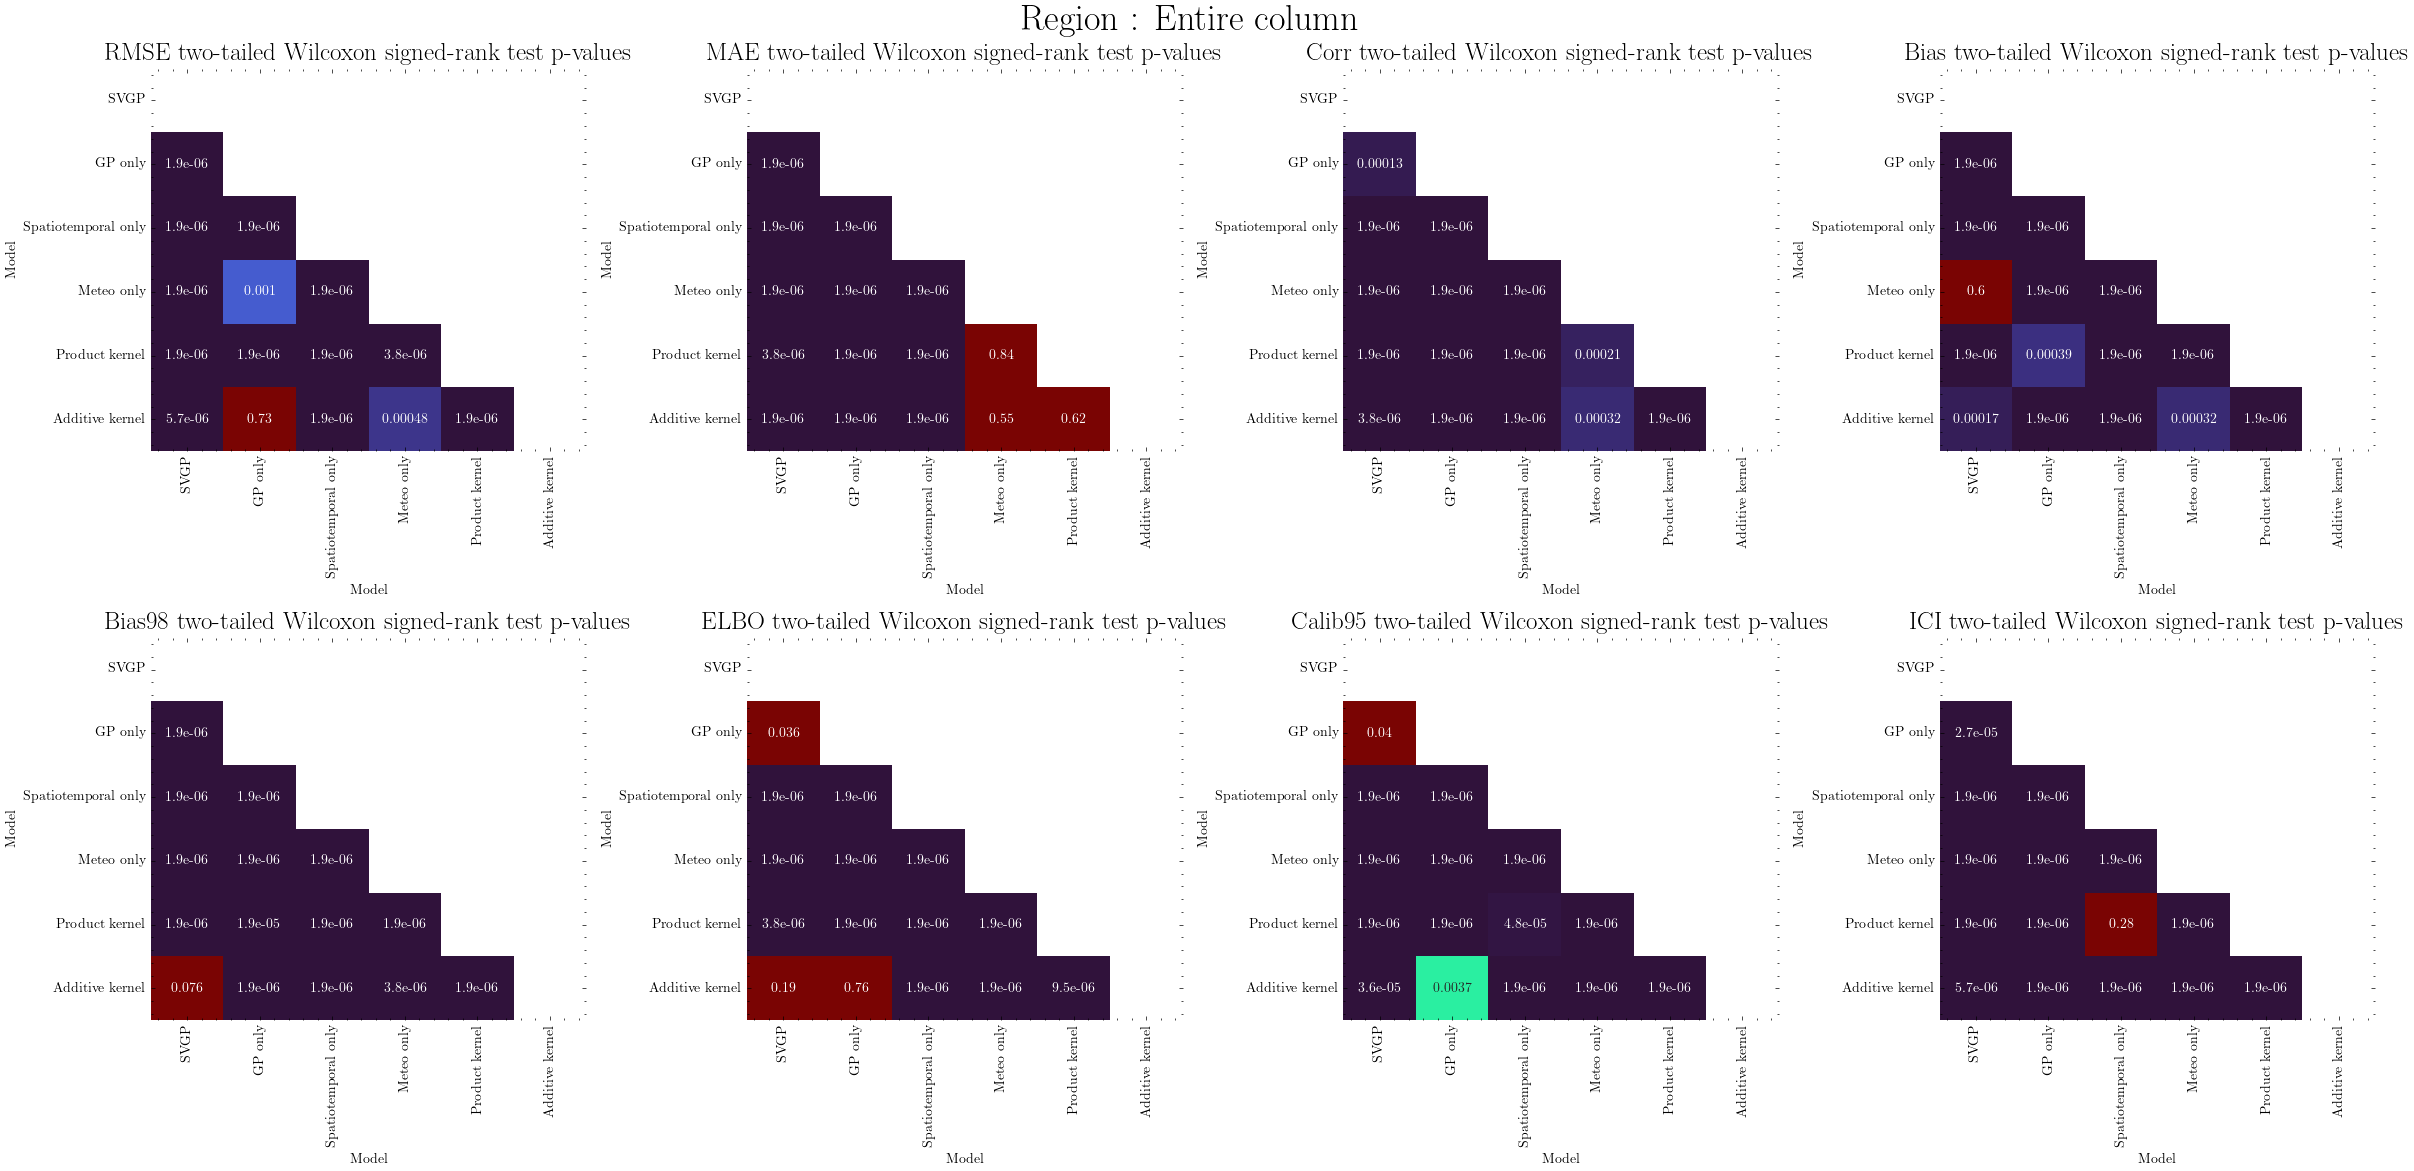

In [70]:
ncol = len(p_dict) // 2
fig, ax = plt.subplots(2, ncol, figsize=(6 * ncol, 12))
for i, key in enumerate(p_dict.keys()):
    mask = np.zeros_like(p_dict[key], dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    p_dict[key][mask] = np.nan
    sns.heatmap(p_dict[key], cmap="turbo", annot=True, cbar=False, vmin=0, vmax=0.01, ax=ax[i // ncol, i % ncol])
    ax[i // ncol, i % ncol].set_title(f"{key} two-tailed Wilcoxon signed-rank test p-values", fontsize=18)
plt.suptitle("Region : Entire column", fontsize=26)
plt.tight_layout()
plt.show()

In [72]:
boundary_layer_det_df = pd.DataFrame(boundary_layer_det_scores).T
boundary_layer_det_df.index = index
boundary_layer_det_df.index.name = 'Model'
boundary_layer_det_df.columns = det_columns
boundary_layer_det_df = boundary_layer_det_df.reindex(index_order)
boundary_layer_det_df = boundary_layer_det_df[det_cols_order]

boundary_layer_prob_df = pd.DataFrame(boundary_layer_prob_scores).T
boundary_layer_prob_df.index = index
boundary_layer_prob_df.index.name = 'Model'
boundary_layer_prob_df.columns = prob_columns
boundary_layer_prob_df = boundary_layer_prob_df.reindex(index_order)
boundary_layer_prob_df = boundary_layer_prob_df[prob_cols_order]

boundary_layer_df = pd.concat([boundary_layer_det_df, boundary_layer_prob_df], axis=1)
W_dict, p_dict = paired_wilcoxon(boundary_layer_df.T)

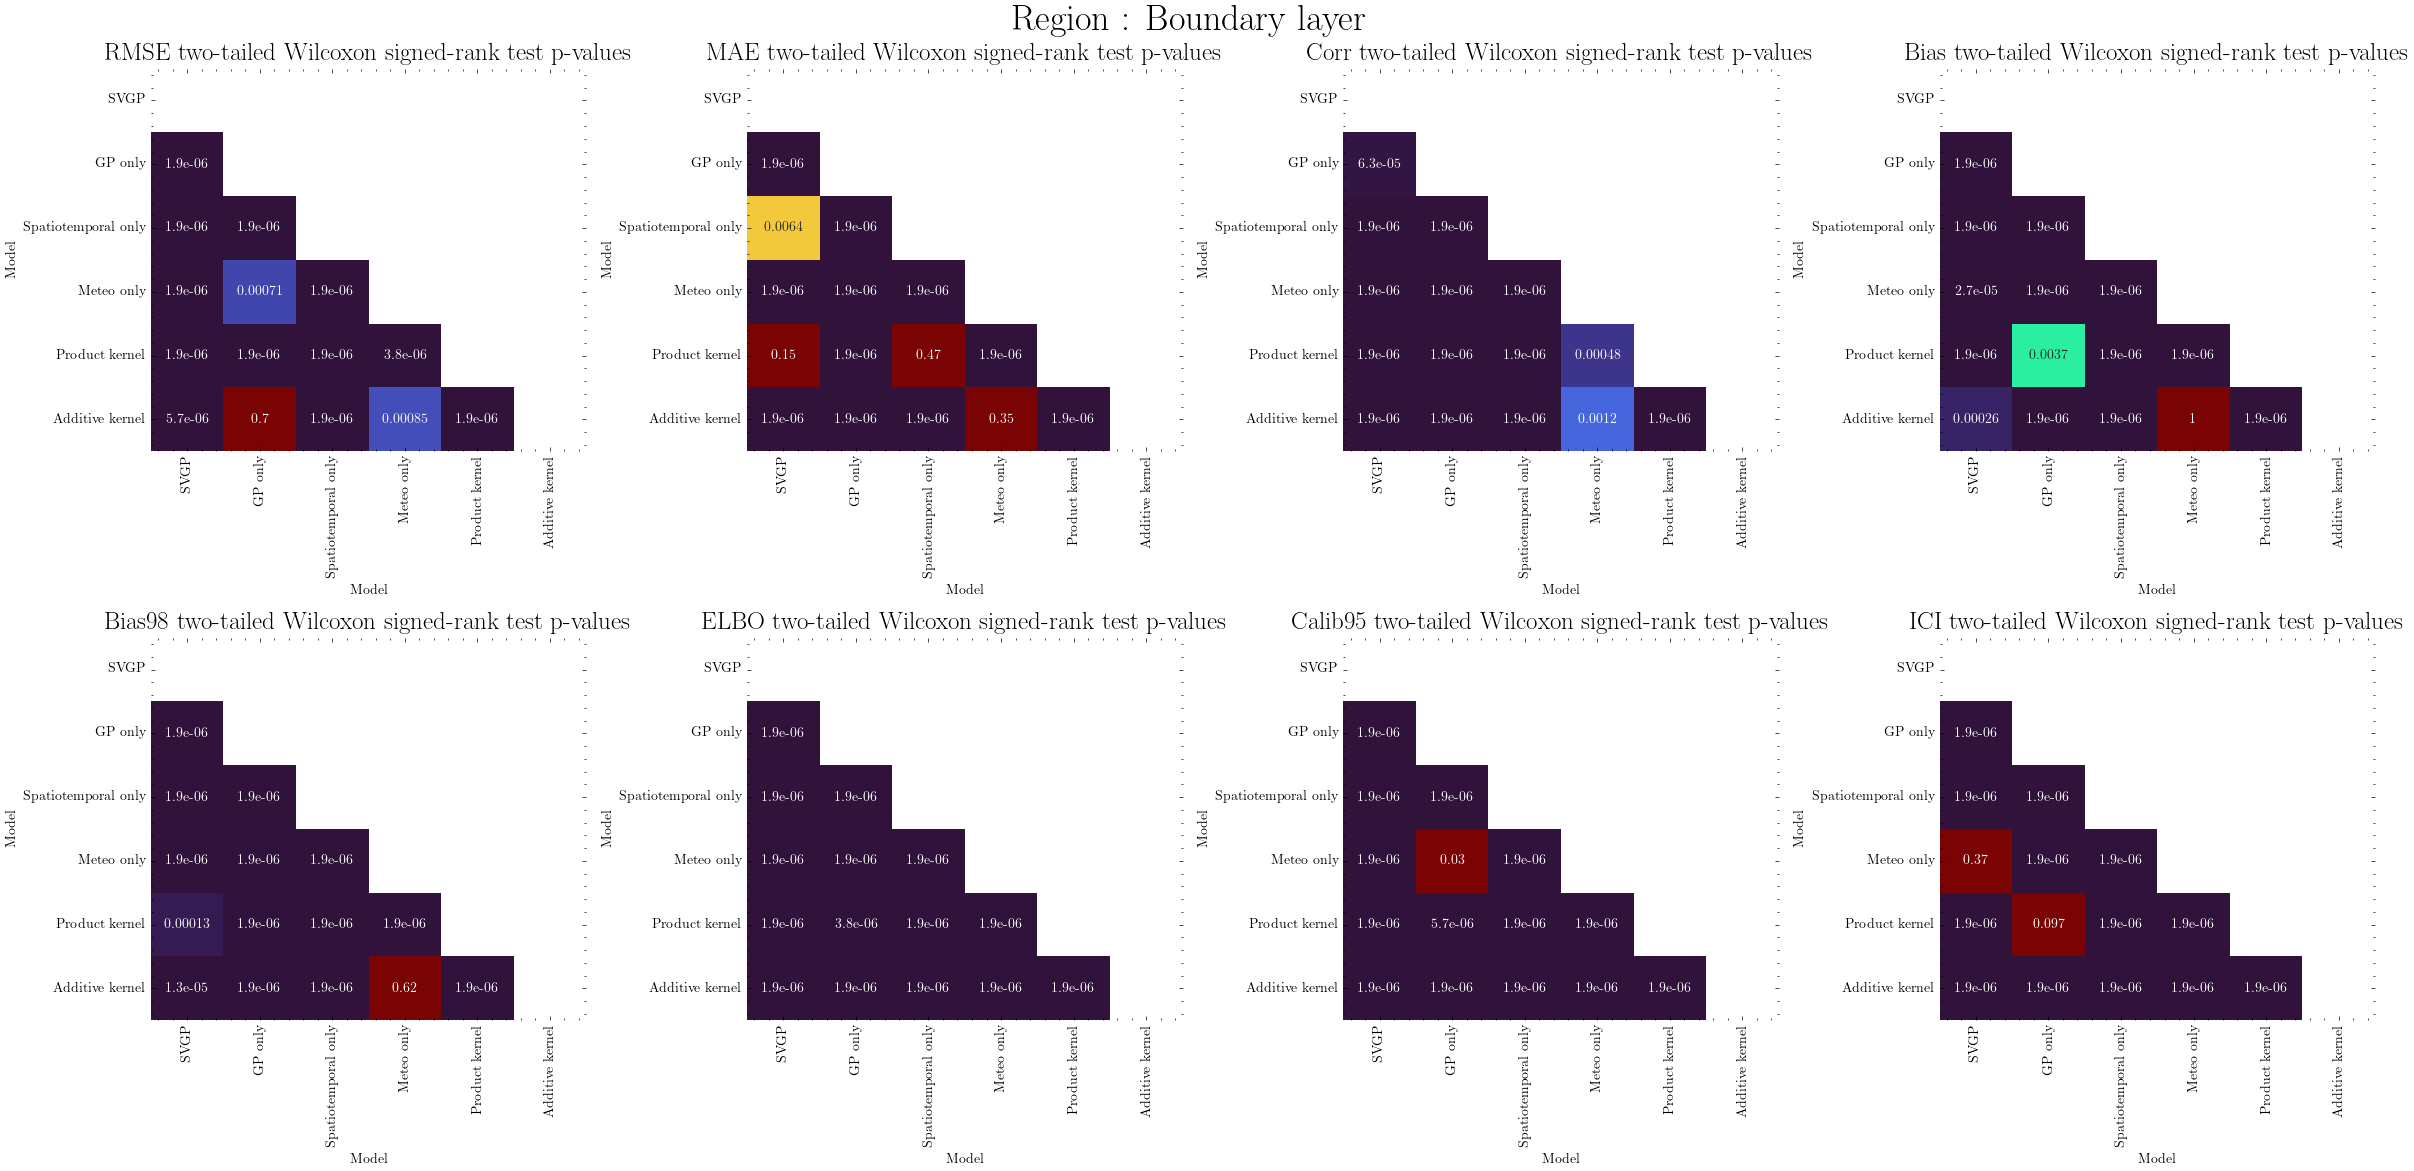

In [73]:
ncol = len(p_dict) // 2
fig, ax = plt.subplots(2, ncol, figsize=(6 * ncol, 12))
for i, key in enumerate(p_dict.keys()):
    mask = np.zeros_like(p_dict[key], dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    p_dict[key][mask] = np.nan
    sns.heatmap(p_dict[key], cmap="turbo", annot=True, cbar=False, vmin=0, vmax=0.01, ax=ax[i // ncol, i % ncol])
    ax[i // ncol, i % ncol].set_title(f"{key} two-tailed Wilcoxon signed-rank test p-values", fontsize=18)
plt.suptitle("Region : Boundary layer", fontsize=26)
plt.tight_layout()
plt.show()

In [74]:
above_boundary_layer_det_df = pd.DataFrame(above_boundary_layer_det_scores).T
above_boundary_layer_det_df.index = index
above_boundary_layer_det_df.index.name = 'Model'
above_boundary_layer_det_df.columns = det_columns
above_boundary_layer_det_df = above_boundary_layer_det_df.reindex(index_order)
above_boundary_layer_det_df = above_boundary_layer_det_df[det_cols_order]

above_boundary_layer_prob_df = pd.DataFrame(above_boundary_layer_prob_scores).T
above_boundary_layer_prob_df.index = index
above_boundary_layer_prob_df.index.name = 'Model'
above_boundary_layer_prob_df.columns = prob_columns
above_boundary_layer_prob_df = above_boundary_layer_prob_df.reindex(index_order)
above_boundary_layer_prob_df = above_boundary_layer_prob_df[prob_cols_order]

above_boundary_layer_df = pd.concat([above_boundary_layer_det_df, above_boundary_layer_prob_df], axis=1)
W_dict, p_dict = paired_wilcoxon(above_boundary_layer_df.T)

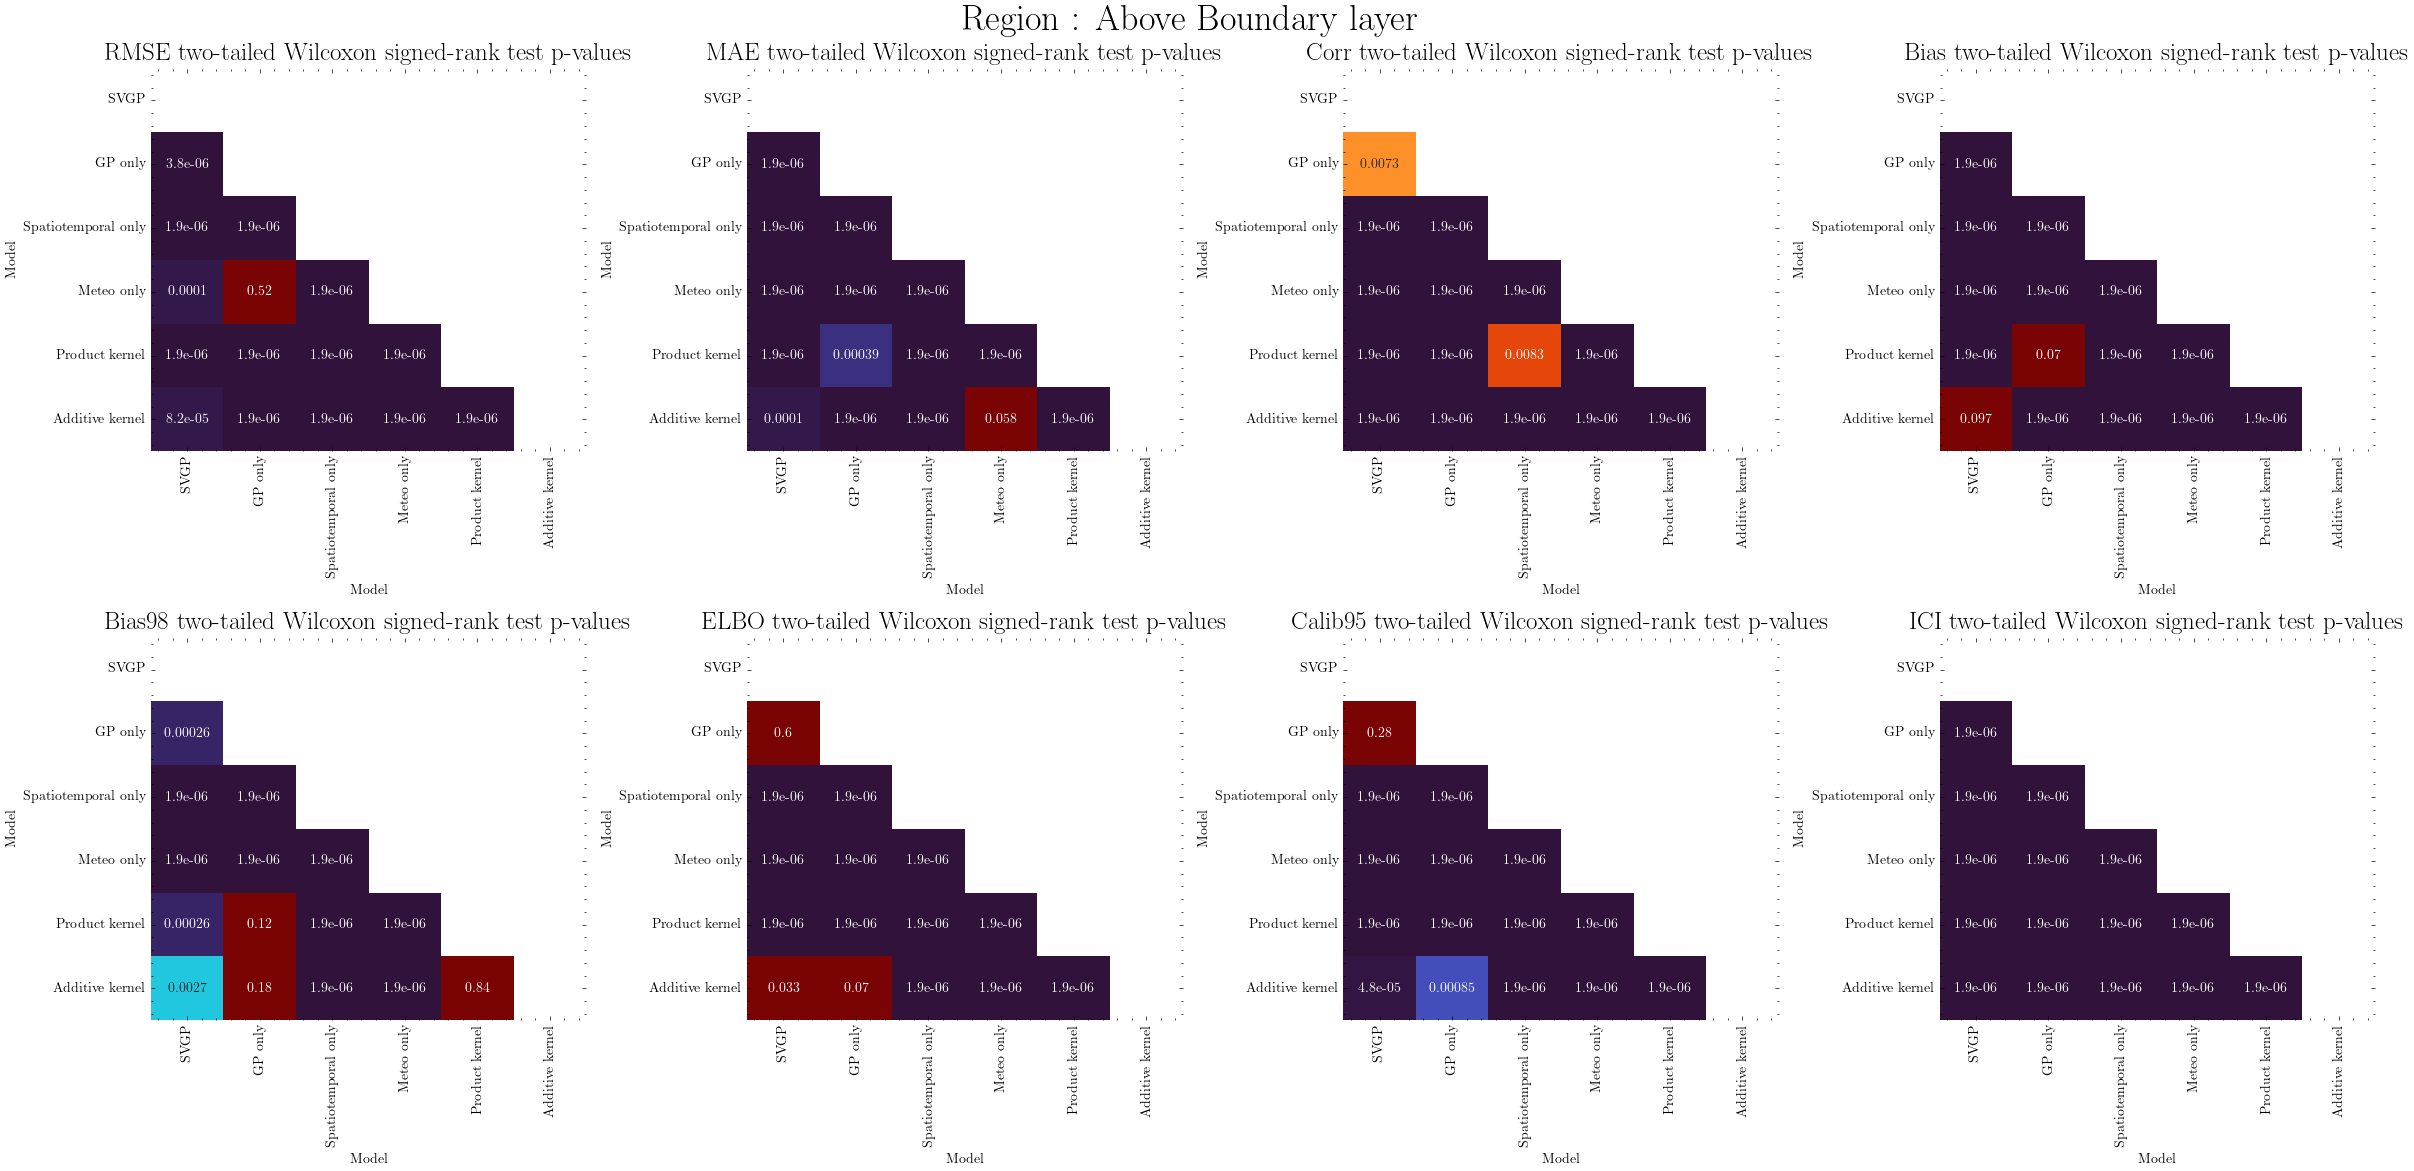

In [75]:
ncol = len(p_dict) // 2
fig, ax = plt.subplots(2, ncol, figsize=(6 * ncol, 12))
for i, key in enumerate(p_dict.keys()):
    mask = np.zeros_like(p_dict[key], dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    p_dict[key][mask] = np.nan
    sns.heatmap(p_dict[key], cmap="turbo", annot=True, cbar=False, vmin=0, vmax=0.01, ax=ax[i // ncol, i % ncol])
    ax[i // ncol, i % ncol].set_title(f"{key} two-tailed Wilcoxon signed-rank test p-values", fontsize=18)
plt.suptitle("Region : Above Boundary layer", fontsize=26)
plt.tight_layout()
plt.show()